Cancer Project (Malign vs Benign)

In this project, I created a neural network model that can predict whether a tumor is malign or benign based on the many different variables that were added in the dataset.
The format for this project is as follow:
    1. EDA
    2. Creating the model
    3. Evaluating the model
    
Note: Code is followed by a description. 

In [6]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',20)
os.chdir("C:\\users\julie\pJupyterProjects\Data Science")


df = pd.read_csv('cancer_classification.csv')
print(df.head)
print(df.info())

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

The .info() method was used to find out how many entries there are (and whether the entries are the same amount for each columns), whether there are null values, and whether the values in each columns are properly represented by its corresponding Dtype.
For this project, I was fortunate to have a dataset that did not need to be cleaned.

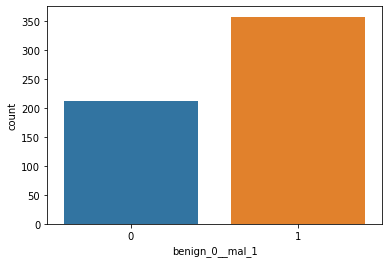

In [4]:
sns.countplot(data=df,x='benign_0__mal_1')        
plt.show()

The figure shows that benign vs malignant is a little balanced (can definitely be used for data analysis since there is no extreme differences).

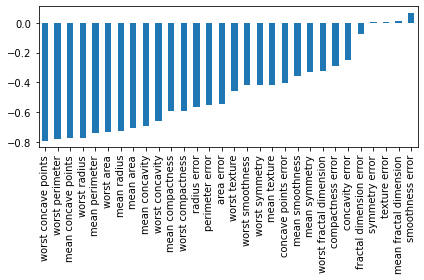

In [5]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')     
plt.tight_layout()
plt.show()


This figure shows what is correlated with the benign vs malignant column. 
The[:-1] means that you want to plot everything but the last column (in this case, the last column represents malign and benign).
Already, we can see that there are some variables that are strongly negatively correlated which indicates that we should get strong predictions.

Time to create the model!

In [13]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)         
X_test = scaler.transform(X_test)

Train-test splitting and scaling the data.

In [14]:
model = Sequential()
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(rate=0.5))         
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.7349 - val_loss: 0.6898
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7042 - val_loss: 0.6613
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6659 - val_loss: 0.6415
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6699 - val_loss: 0.6259
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6383 - val_loss: 0.6060
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6292 - val_loss: 0.5873
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5974 - val_loss: 0.5672
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5779 - val_loss: 0.5431
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5602 - val_loss: 0.5176
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5259 - val_loss: 0.4908
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1198 - val_loss: 0.1052
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1321 - val_loss: 0.1050
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1336 - val_loss: 0.1045
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1217 - val_loss: 0.0998
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1296 - val_loss: 0.1028
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1172 - val_loss: 0.1064
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1282 - val_loss: 0.1011
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1132 - val_loss: 0.1026
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1431 - val_loss: 0.1350
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1265 - val_loss: 0.1029
Epoch 93/600


Since we are tracking our validation loss, we want out mode to be min (minimize loss). Patience means that we will wait 25 epochs even after we detected a stopping point because of noise that could occur.
It's a large epoch, but since we are using early stopping, the model will run optimally.

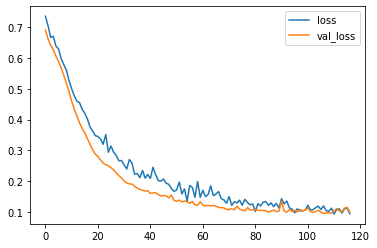

In [15]:
a = pd.DataFrame(model.history.history)
a.plot()
plt.show()

Graphs shows that early stopping prevented the overfitting to our training data.

In [16]:
prediction = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.96      0.99      0.97        95

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

[[44  4]
 [ 1 94]]


The results from the model evaluation shows that the model performed well and was able to have a high precision and recal rate.